# Tareas:
- ### Definición del problema. **<u>CHECK</u>**
- ### Recopilación de datos. **<u>CHECK</u>**
- ### Exploratory Data Analysis (EDA). **<u>IN PROGRESS</u>**
- ### Procesamiento de Datos.
- ### Métodos de Validación.
- ### Modelo de Machine Learning.
- ### Desempeño del modelo (métricas).
- ### Tuning.
- ### Resultados y Conclusiones.

<p style="text-align: center; font-size: 30px;">Línea de Crédito con Garantía Hipotecaria. <br> Predicción de Riesgo.</p>

<div style="text-align:center;">
  <img src="https://daxg39y63pxwu.cloudfront.net/hackerday_banner/hq/loan-default-risk-prediction-machine-learning-project.jpg" alt="Loan Default Risk Prediction" width="70%">
</div>

# 1. Introducción

<span style="font-size:larger;">
    
Este proyecto se centra en un conjunto de datos anonimizados de solicitudes de líneas de crédito con garantía hipotecaria (HELOC) realizadas por propietarios reales. Un **HELOC** es una línea de crédito ofrecida típicamente por un banco como un porcentaje del capital acumulado en una vivienda (la diferencia entre el valor de mercado actual de una vivienda y su precio de compra). Los clientes en este conjunto de datos han solicitado una línea de crédito en el rango de `5,000$` a `150,000$`. La **<u>tarea fundamental</u>** de este proyecto es utilizar la información sobre el solicitante en su informe crediticio para **<u>predecir si pagará su cuenta de HELOC en un plazo de 2 años</u>**. Esta predicción se utiliza luego para decidir si el propietario califica para una línea de crédito y, en caso afirmativo, cuánto crédito se debe otorgar.

</span>

<span style="font-size:larger;">
    
Antes de pasar a la descripción de las variables es importante definir los siguientes términos:
- <u>**"Cuenta Comercial"**</u>:<br>Las cuentas comerciales de un cliente se refieren a las relaciones financieras que el cliente ha establecido con diversas entidades comerciales. Estas cuentas representan acuerdos o transacciones financieras que el cliente mantiene con empresas, instituciones financieras o proveedores de servicios. Las cuentas comerciales pueden incluir una variedad de productos y servicios financieros, y las transacciones asociadas con estas cuentas quedan registradas en el historial crediticio del cliente. La información de las cuentas comerciales que posee un cliente nos da una idea del comportamiento financiero de este.
    
- <u>**"Préstamos de Instalación"**</u>:<br> Estos son préstamos que se otorgan para financiar la compra de bienes duraderos o servicios específicos que generalmente se pagan en cuotas fijas a lo largo del tiempo. Estos préstamos son comunes para la adquisición de activos como automóviles, electrodomésticos, muebles, mejoras en el hogar, entre otros.
    - <u>**"Carga de Préstamos de Instalación"**</u>:<br> Es la proporción de la deuda relacionada con estos préstamos específicos con respecto al límite total de crédito disponible. Este indicador se utiliza para comprender la diversidad de las deudas de un individuo y evaluar cómo están utilizando su crédito para diferentes propósitos. Un bajo porcentaje puede indicar una gestión más equilibrada y diversa del crédito.<br>
    *<u>Ejemplo</u>*: Supongamos que tenemos una tarjeta de crédito con un límite total de `10,000$`. De ese límite, utilizamos `2,000$` para financiar la compra de muebles nuevos para el hogar, que pagamos en cuotas mensuales. La carga de préstamo de instalación sería del 20%, lo que significa que el 20% de tu límite total de crédito se está utilizando específicamente para préstamos de instalación.<br><br>
    
- <u>**"Consulta crediticia"**</u>:<br> Es la revisión de la información crediticia de un individuo por parte de una entidad financiera u otra institución autorizada. Esta consulta se realiza para evaluar la solvencia crediticia de la persona.
    
- <u>**"Línea de Crédito Rotativo"**</u>:<br> Es una forma de crédito renovable que permite a los individuos tomar prestado repetidamente hasta un límite preestablecido. Las tarjetas de crédito son un ejemplo común de líneas de crédito rotativo.
    - <u>**"Carga de Crédito Rotativo"**</u>:<br> Representa la cantidad de la línea de crédito rotativo que está actualmente en uso. Se expresa típicamente como un porcentaje que indica cuánto del crédito disponible se está utilizando actualmente. La carga de crédito rotativo es un factor importante en la evaluación del riesgo crediticio ya que, un alto porcentaje de carga de crédito rotativo puede interpretarse como una señal de riesgo, indicando una mayor dependencia del crédito.<br>
    *<u>Ejemplo</u>*: Una persona tiene una tarjeta de crédito con un límite de `1,000$` y ha utilizado $300, la carga de crédito rotativo sería del 30%.

</span>

<span style="font-size:larger;">
    
Mostramos a continuación la información contenida en el informe crediticio de un cliente, que se tendrán en cuenta a la hora de predecir si este presenta riesgo de impago o no:

</span>

| **Variable**                           | **Descripción**                                                                                    | **Utilidad**                                                                                                                                                       |
|----------------------------------------|----------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **'RiskPerformance'**                  | Variable a predecir que indica el rendimiento de riesgo del cliente.                               | Esencial para la predicción y evaluación final del riesgo crediticio.                                                                                                |
| **'ExternalRiskEstimate'**             | Estimación numérica del riesgo crediticio externo asociado al cliente.                              | Un valor más alto indica un mayor riesgo, crucial para evaluar la capacidad del cliente para cumplir con los pagos.                                                 |
| **'MSinceOldestTradeOpen'**            | Meses desde la apertura de la cuenta comercial más antigua del cliente.                              | La estabilidad a largo plazo puede sugerir un comportamiento crediticio más confiable.                                                                             |
| **'MSinceMostRecentTradeOpen'**        | Meses desde la apertura de la cuenta comercial más reciente del cliente.                             | Indica la antigüedad de la cuenta comercial más reciente en meses.                                                                                                   |
| **'AverageMInFile'**                   | Promedio de meses que la información crediticia del cliente ha estado en archivo.                    | Ayuda a entender la consistencia y estabilidad en el historial crediticio a lo largo del tiempo.                                                                    |
| **'NumSatisfactoryTrades'**            | Número de operaciones comerciales que el cliente ha manejado de manera satisfactoria.               | Indica la capacidad del cliente para manejar transacciones de manera exitosa.                                                                                        |
| **'NumTrades60Ever2DerogPubRec'**      | Número de operaciones comerciales en los últimos 60 meses con al menos dos registros derogatorios o públicos. | Indica la presencia de eventos negativos recientes.                                                                                                                |
| **'NumTrades90Ever2DerogPubRec'**      | Número de operaciones comerciales en los últimos 90 meses con al menos dos registros derogatorios o públicos. | Similar al anterior, pero en un periodo de tiempo más amplio.                                                                                                      |
| **'PercentTradesNeverDelq'**           | Porcentaje de transacciones comerciales en las que el cliente nunca ha incurrido en demoras.         | Representa la buena conducta de pago del cliente.                                                                                                                   |
| **'MSinceMostRecentDelq'**             | Meses desde la última demora en el pago.                                                           | Muestra el tiempo desde la última vez que el cliente no cumplió con los pagos.                                                                                     |
| **'MaxDelq2PublicRecLast12M'**        | Máxima demora atrasada a registros públicos en los últimos 12 meses.                                | Indica la gravedad de las demoras en los últimos 12 meses.                                                                                                          |
| **'MaxDelqEver'**                      | Máxima demora atrasada jamás registrada.                                                          | Refleja la demora más severa que el cliente ha experimentado.                                                                                                       |
| **'NumTotalTrades'**                   | Número total de operaciones comerciales en el historial crediticio.                                 | Representa la cantidad global de transacciones comerciales en la historia del cliente.                                                                             |
| **'NumTradesOpeninLast12M'**           | Número de operaciones comerciales abiertas en los últimos 12 meses.                                  | Indica cuántas cuentas comerciales ha abierto el cliente recientemente.                                                                                             |
| **'PercentInstallTrades'**            | Porcentaje de transacciones comerciales relacionadas con instalaciones crediticias.                 | Representa la proporción de transacciones asociadas a préstamos de instalación.                                                                                     |
| **'MSinceMostRecentInqexcl7days'**    | Meses desde la última consulta crediticia (excluyendo las realizadas en los últimos 7 días).        | Muestra el tiempo desde la última vez que se consultó la información crediticia.                                                                                    |
| **'NumInqLast6M'**                    | Número de consultas a la información crediticia en los últimos 6 meses.                              | Indica cuántas veces se ha revisado el historial crediticio en un periodo reciente.                                                                                |
| **'NumInqLast6Mexcl7days'**           | Número de consultas a la información crediticia en los últimos 6 meses (excluyendo las realizadas en los últimos 7 días). | Similar al anterior, pero excluyendo consultas muy recientes.                                                                                                       |
| **'NetFractionRevolvingBurden'**      | Fracción neta de la carga de crédito rotativo.                                                     | Representa la proporción de la deuda en tarjetas de crédito respecto al límite total.                                                                              |
| **'NetFractionInstallBurden'**        | Fracción neta de la carga de préstamos de instalación.                                             | Indica la proporción de la deuda en préstamos de instalación respecto al límite total.                                                                              |
| **'NumRevolvingTradesWBalance'**      | Número de operaciones comerciales rotativas con saldo pendiente.                                    | Indica cuántas cuentas de tarjetas de crédito tienen saldos pendientes.                                                                                             |
| **'NumInstallTradesWBalance'**        | Número de operaciones comerciales de instalación con saldo pendiente.                               | Similar al anterior, pero para cuentas de préstamos de instalación.                                                                                                 |
| **'NumBank2NatlTradesWHighUtilization'** | Número de operaciones comerciales de bancos frente a operaciones nacionales con alta utilización.  | Indica la presencia de cuentas de bancos con alto uso en comparación con cuentas nacionales.                                                                        |
| **'PercentTradesWBalance'**            | Porcentaje de transacciones comerciales con saldo pendiente.                                        | Representa el porcentaje de transacciones comerciales en las que el cliente mantiene un saldo pendiente.                                                            |

# 2. Importación de paquetes y DataSet

## 2.1. Paquetes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Preprocesado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split


# Modelos de Clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier








## 2.2. DataSet
<span style="font-size:larger;">

El DataSet de trabajo es propiedad de [FICO](https://www.fico.com/en).<br>

Los datos se han obtenido en [huggingface](https://huggingface.co/datasets/mstz/heloc), gracias a [Mattia](https://huggingface.co/mstz).
    
</span>


In [4]:
df = pd.read_csv("heloc.csv")

# 3. Análisis Exploratorio de Datos

In [5]:
df.head(3)

RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0             Bad                    55                    144   
1             Bad                    61                     58   
2             Bad                    67                     66   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                          4              84                     20   
1                         15              41                      2   
2                          5              24                      9   

   NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                            3                            0   
1                            4                            4   
2                            0                            0   

   PercentTradesNeverDelq  MSinceMostRecentDelq  ...  PercentInstallTrades  \
0                      83                     2  ...                    43   
1                     100                    -7  ...                    67   
2                     100                    -7  ...                    44   

   MSinceMostRecentInqexcl7days  NumInqLast6M  NumInqLast6Mexcl7days  \
0                             0             0                      0   
1                             0             0                      0   
2                             0             4                      4   

   NetFractionRevolvingBurden  NetFractionInstallBurden  \
0                          33                        -8   
1                           0                        -8   
2                          53                        66   

   NumRevolvingTradesWBalance  NumInstallTradesWBalance  \
0                           8                         1   
1                           0                        -8   
2                           4                         2   

   NumBank2NatlTradesWHighUtilization  PercentTradesWBalance  
0                                   1                     69  
1                                  -8                      0  
2                                   1                     86  

[3 rows x 24 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

In [8]:
df.describe()

ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
count          10459.000000           10459.000000               10459.000000   
mean              67.425758             184.205373                   8.543455   
std               21.121621             109.683816                  13.301745   
min               -9.000000              -9.000000                  -9.000000   
25%               63.000000             118.000000                   3.000000   
50%               71.000000             178.000000                   5.000000   
75%               79.000000             249.500000                  11.000000   
max               94.000000             803.000000                 383.000000   

       AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
count    10459.000000           10459.000000                 10459.000000   
mean        73.843293              19.428052                     0.042738   
std         38.782803              13.004327                     2.513910   
min         -9.000000              -9.000000                    -9.000000   
25%         52.000000              12.000000                     0.000000   
50%         74.000000              19.000000                     0.000000   
75%         95.000000              27.000000                     1.000000   
max        383.000000              79.000000                    19.000000   

       NumTrades90Ever2DerogPubRec  PercentTradesNeverDelq  \
count                 10459.000000            10459.000000   
mean                     -0.142843               86.661536   
std                       2.367397               25.999584   
min                      -9.000000               -9.000000   
25%                       0.000000               87.000000   
50%                       0.000000               96.000000   
75%                       0.000000              100.000000   
max                      19.000000              100.000000   

       MSinceMostRecentDelq  MaxDelq2PublicRecLast12M  ...  \
count          10459.000000              10459.000000  ...   
mean               6.762406                  4.928291  ...   
std               20.501250                  3.756275  ...   
min               -9.000000                 -9.000000  ...   
25%               -7.000000                  4.000000  ...   
50%               -7.000000                  6.000000  ...   
75%               14.000000                  7.000000  ...   
max               83.000000                  9.000000  ...   

       PercentInstallTrades  MSinceMostRecentInqexcl7days  NumInqLast6M  \
count          10459.000000                  10459.000000  10459.000000   
mean              32.166460                     -0.325366      0.868152   
std               20.128634                      6.067556      3.179304   
min               -9.000000                     -9.000000     -9.000000   
25%               20.000000                     -7.000000      0.000000   
50%               31.000000                      0.000000      1.000000   
75%               44.000000                      1.000000      2.000000   
max              100.000000                     24.000000     66.000000   

       NumInqLast6Mexcl7days  NetFractionRevolvingBurden  \
count           10459.000000                10459.000000   
mean                0.812602                   31.629888   
std                 3.143698                   30.060140   
min                -9.000000                   -9.000000   
25%                 0.000000                    5.000000   
50%                 1.000000                   25.000000   
75%                 2.000000                   54.000000   
max                66.000000                  232.000000   

       NetFractionInstallBurden  NumRevolvingTradesWBalance  \
count              10459.000000                10459.000000   
mean                  39.158906                    3.185008   
std                   42.101601                    4.413173

<Axes: xlabel='ExternalRiskEstimate', ylabel='Count'>

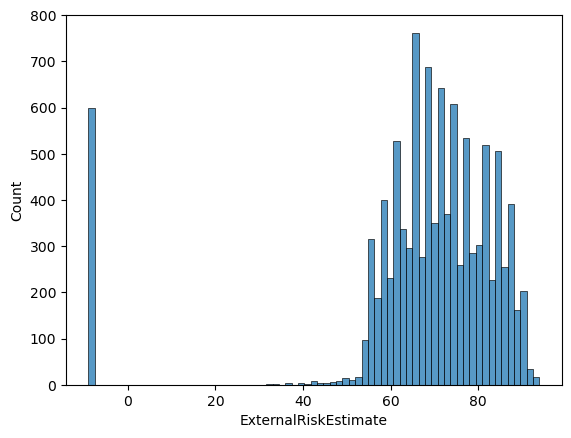

In [10]:
sns.histplot(df["ExternalRiskEstimate"])

In [14]:
df_sin_neg = df[df["ExternalRiskEstimate"]>0]

In [15]:
df_sin_neg.describe()

ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
count           9861.000000            9861.000000                9861.000000   
mean              72.060440             195.765947                   9.520535   
std                9.871795             101.913629                  12.288235   
min               33.000000              -8.000000                   0.000000   
25%               64.000000             131.000000                   3.000000   
50%               72.000000             183.000000                   6.000000   
75%               80.000000             255.000000                  12.000000   
max               94.000000             803.000000                 227.000000   

       AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
count     9861.000000            9861.000000                  9861.000000   
mean        78.744245              21.130413                     0.580570   
std         33.904646              11.302849                     1.238056   
min          4.000000               0.000000                     0.000000   
25%         57.000000              13.000000                     0.000000   
50%         76.000000              20.000000                     0.000000   
75%         97.000000              28.000000                     1.000000   
max        322.000000              79.000000                    19.000000   

       NumTrades90Ever2DerogPubRec  PercentTradesNeverDelq  \
count                  9861.000000              9861.00000   
mean                      0.383734                92.35899   
std                       0.991851                11.76934   
min                       0.000000                 0.00000   
25%                       0.000000                89.00000   
50%                       0.000000                97.00000   
75%                       0.000000               100.00000   
max                      19.000000               100.00000   

       MSinceMostRecentDelq  MaxDelq2PublicRecLast12M  ...  \
count           9861.000000               9861.000000  ...   
mean               7.709157                  5.758138  ...   
std               20.735160                  1.641567  ...   
min               -8.000000                  0.000000  ...   
25%               -7.000000                  5.000000  ...   
50%                0.000000                  6.000000  ...   
75%               15.000000                  7.000000  ...   
max               83.000000                  9.000000  ...   

       PercentInstallTrades  MSinceMostRecentInqexcl7days  NumInqLast6M  \
count           9861.000000                   9861.000000   9861.000000   
mean              34.593348                      0.192475      1.455532   
std               17.907026                      5.855050      2.135229   
min                0.000000                     -8.000000      0.000000   
25%               21.000000                      0.000000      0.000000   
50%               33.000000                      0.000000      1.000000   
75%               45.000000                      1.000000      2.000000   
max              100.000000                     24.000000     66.000000   

       NumInqLast6Mexcl7days  NetFractionRevolvingBurden  \
count            9861.000000                 9861.000000   
mean                1.396714                   34.084170   
std                 2.095491                   29.202295   
min                 0.000000                   -8.000000   
25%                 0.000000                    8.000000   
50%                 1.000000                   28.000000   
75%                 2.000000                   56.000000   
max                66.000000                  232.000000   

       NetFractionInstallBurden  NumRevolvingTradesWBalance  \
count               9861.000000                 9861.000000   
mean                  42.048981                    3.919075   
std                   41.605560                    3.342538

In [16]:
df_sin_neg[df_sin_neg["MSinceOldestTradeOpen"]<0]

RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
145               Bad                    59                     -8   
518              Good                    60                     -8   
604               Bad                    87                     -8   
2241             Good                    85                     -8   
2250             Good                    88                     -8   
...               ...                   ...                    ...   
10010             Bad                    62                     -8   
10145             Bad                    56                     -8   
10153             Bad                    71                     -8   
10166            Good                    83                     -8   
10185            Good                    82                     -8   

       MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
145                            5              82                     20   
518                            8              88                     55   
604                           18             102                     11   
2241                          14             140                     24   
2250                          16             121                     24   
...                          ...             ...                    ...   
10010                          6              66                     12   
10145                         37              90                     11   
10153                         70              93                      5   
10166                         12              82                     10   
10185                          4              55                     24   

       NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
145                              5                            5   
518                              0                            0   
604                              0                            0   
2241                             0                            0   
2250                             0                            0   
...                            ...                          ...   
10010                            2                            0   
10145                            7                            5   
10153                            1                            1   
10166                            0                            0   
10185                            0                            0   

       PercentTradesNeverDelq  MSinceMostRecentDelq  ...  \
145                        78                     6  ...   
518                        95                    10  ...   
604                       100                    -7  ...   
2241                      100                    -7  ...   
2250                      100                    -7  ...   
...                       ...                   ...  ...   
10010                      79                    10  ...   
10145                      55                     4  ...   
10153                     100                    -7  ...   
10166                      85                    75  ...   
10185                     100                    -7  ...   

       PercentInstallTrades  MSinceMostRecentInqexcl7days  NumInqLast6M  \
145                      67                             4             1   
518                      34                            -7             1   
604                       9                            -7             0   
2241                     50                            -7             0   
2250                     17                            -7             0   
...                     ...                           ...           ...   
10010                    36                            -7             1   
10145                    65                             9             0   
10153                    40                            14      

## 3.X. Duplicados

<span style="font-size:larger;">
    En esta subsección exploraremos la posibilidad de tener filas duplicadas.
</span>


In [13]:
df.duplicated().value_counts()

False    9872
True      587
Name: count, dtype: int64

## 3.X. Valores NaN

<span style="font-size:larger;">
Vamos a revisar a continuación si existen valores NaN. Estos pueden generar errores a la hora de entrenar nuestro modelo y en caso de existir se tratarían mediante una de estas opciones:<br>

- Rellenar con la moda o la media del conjunto.
    
- Imputando valores a traves de un algoritmo de vecinos más próximos como KNNImputer.
    
- Considerarlos como una nueva categoría llamada "Indeterminado".
    
- Eliminarlos.
</span>

In [7]:
df.isna().sum()

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
dtype: int64

<span style="font-size:larger;">
    
**Nuestro DataSet no presenta valores NaN en ninguna de nuestras variables.**
    
</span>